In [1]:
from sklearn.cluster import KMeans
from collections import Counter
from matplotlib import pyplot as plt
import cv2
import os
import json
import operator

# Utility function, rgb to hex
def rgb2hex(rgb):
    hex = "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
    return hex

H:21.021470676821117
S:0.34215343242858615
V:0.9914708315087822
橘色


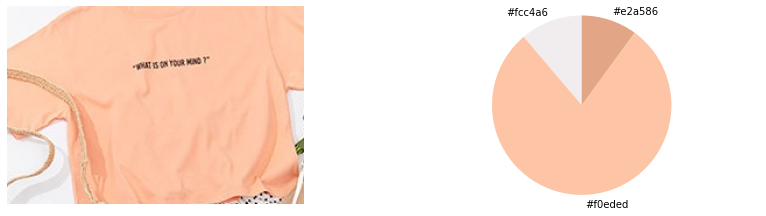

H:47.31092040739341
S:0.4521351061335001
V:0.823026421605182
黄色


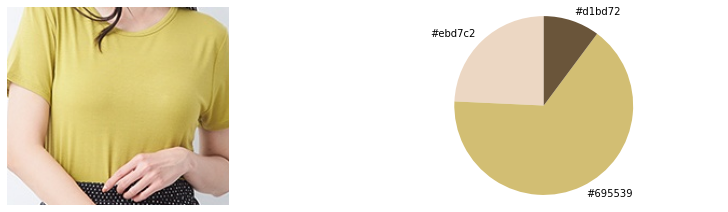

H:28.274562645594486
S:0.41626487220480185
V:0.9744125366682106
橘色


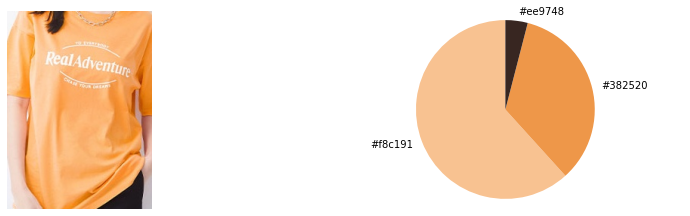

H:28.25793494172133
S:0.5016956374619328
V:0.9669769020092586
橘色


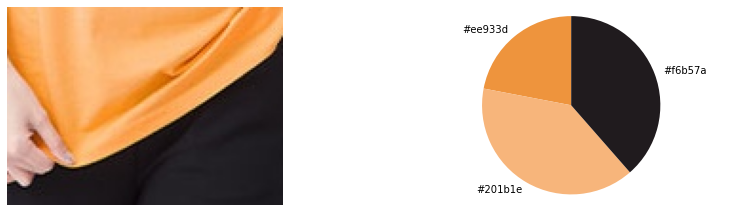

H:22.539371985355398
S:0.2838803339606897
V:0.9032659042084218
橘色


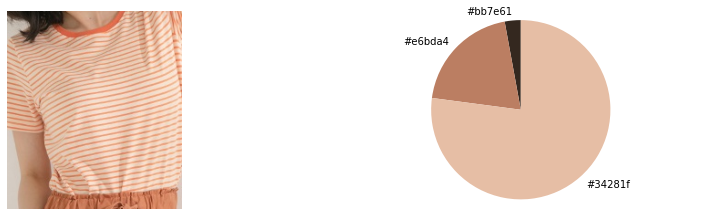

H:41.36754541070568
S:0.5672299556257978
V:0.8215038661704236
黄色


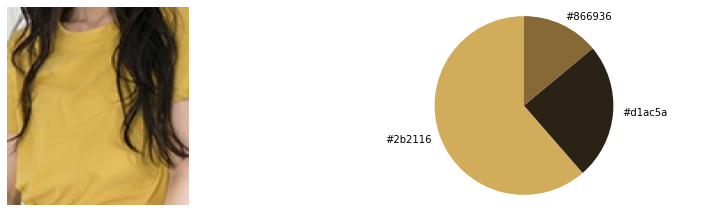

H:27.46828177360082
S:0.5925248020773062
V:0.9608792341279527
橘色


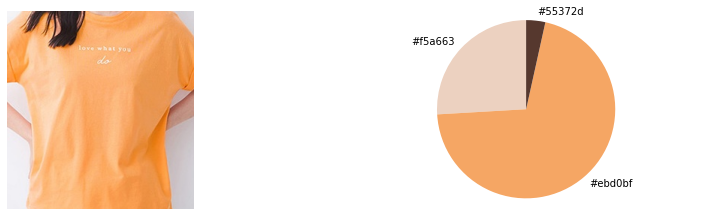

H:28.059740534123435
S:0.471646812357202
V:0.9868001170617501
橘色


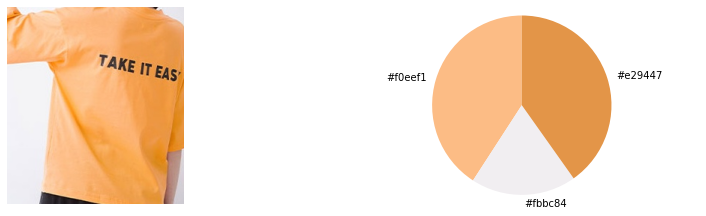

H:59.988983929497145
S:0.1389354464549644
V:0.9195940445143574
黄色


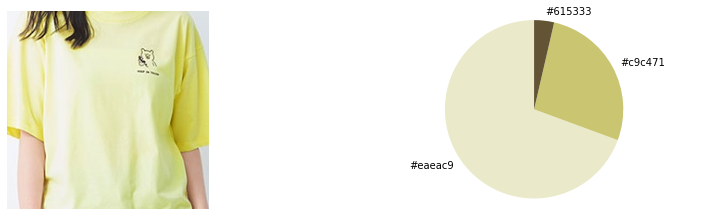

H:30.06427282496298
S:0.2971186341976693
V:0.8816766255034745
橘色


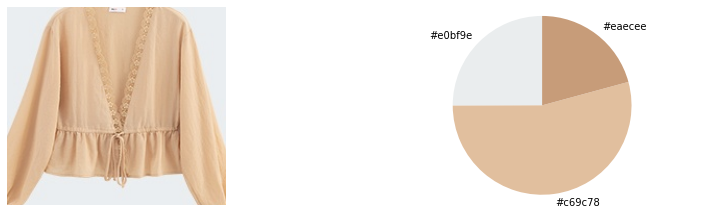

In [6]:
base_location = 'D:/test_color'

jList = os.listdir(base_location)

for file in jList:
    
    if file.endswith(".jpg"):
        img = cv2.imread(os.path.join(base_location,file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # load image
        #取最高的 k 個顏色
        k=3 
       
        size = img.shape
        # 寬
        w = size[1] 
        # 高
        h = size[0] 
        # 裁切區域的 x 與 y 座標（左上角）
        x1 = int(w * 0.1)
        y1 = int(h * 0.9)
        # 裁切區域的 x 與 y 座標（右下角）
        x2 = int(w * 0.9)
        y2 = int(h * 0.1)
        # 裁切圖片
        img_rgb = img[y2:y1, x1:x2]   

        # resize image to speed up processing time
        resized_img_rgb = cv2.resize(img_rgb, (64, 64), interpolation=cv2.INTER_AREA)

        # reshape the image to be a list of pixels
        img_list = resized_img_rgb.reshape((resized_img_rgb.shape[0] * resized_img_rgb.shape[1], 3))

        # cluster the pixels and assign labels
        clt = KMeans(n_clusters=k)
        labels = clt.fit_predict(img_list)  

        # count labels to find most popular
        label_counts = Counter(labels)
        total_count = sum(label_counts.values())
        new_dict = dict(label_counts)
        sort_new_dict = sorted(new_dict.items(), key=lambda item: item[1])
           
        # 佔比最多的顏色 index
        key = sort_new_dict[k-1][0]
        
        # 顏色比例
        for i in range(0,len(new_dict)):
            p_arr = []
            count = new_dict.get(i)
            percent = round(count/total_count*100)
            #print(percent)

        # subset out most popular centroid
        # RGB
        center_colors = list(clt.cluster_centers_)
        ordered_colors = [center_colors[i]/255 for i in label_counts.keys()]
        color_labels = [rgb2hex(ordered_colors[i]*255) for i in label_counts.keys()]   
    
        main_color_rgb = center_colors[key]
        #print(main_color_rgb)

        sort_main_color_rgb = sorted(main_color_rgb)             
            
        # RGB轉 HSV
        R = main_color_rgb[0]/255 
        G = main_color_rgb[1]/255 
        B = main_color_rgb[2]/255 
            
        max_num = sort_main_color_rgb[k-1]/255 
        min_num = sort_main_color_rgb[0]/255 
        d = max_num - min_num

        V = max_num          
            
        if max_num == 0:
            S = 0
        else:
            S = d/max_num
            
        if d == 0:
            H = 0
        if R == max_num and G >= B: 
            H = ( (G-B)/ d )* 60
        if R == max_num and G < B:
            H = ( (G-B)/ d )* 60 + 360
        if G == max_num:
            H = ( (B-R)/ d )* 60 + 120
        if B == max_num:
            H = ( (R-G)/ d )* 60 + 240
            
        print('H:'+str(H))
        print('S:'+str(S))
        print('V:'+str(V))
            
        Smin = 0.045
        Vmin = 65/255
        Vmax = 0.75
        
        if S > 0.06 and S <= 0.14 and V > Vmax:
            if H < 24 or ( H >= 310 and H <= 360 ):
                color = "pink"
                print("粉红色")                    
                    
            if H >= 24 and H < 110 :
                if H >= 45 and H <= 70:
                    color = "yellow"
                    print("黄色")                
                else:
                    color = "creamy-white"
                    print("米白色")             

            if H>=110 and H<200 :
                color = "light green"
                print("淺綠色")

            if H>=200 and H<250 :
                color = "light blue"
                print("淺藍色")

            if H>=250 and H<310 :
                color = "light purple"
                print("淺紫色")                                                 
        
        elif S > 0.14 and V > Vmin:
            if H < 20 or ( H >= 310 and H <= 360 ):
                if S >= 0.5 and V <= 0.55:
                    color = "dark red"
                    print("酒红色")
                elif S < 0.45 and V > 0.55:
                    color = "pink"
                    print("粉红色")                    
                else:
                    color = "red"
                    print("红色")
                    
            if H >= 20 and H < 45 :
                if S < 0.24 and V >= 0.7:
                    color = "creamy-white"
                    print("米白色")  
                elif S < 0.24 and V < 0.7 and V > 0.6:
                    color = "pink"
                    print("粉红色") 
                elif V <= 0.75:
                    color = "brown"
                    print("咖啡色")
                elif V <= 0.85:
                    color = "yellow"
                    print("黄色")                    
                else:
                    color = "orange"
                    print("橘色")             

            if H >= 45 and H < 70 :
                if V <= 0.75:
                    color = "green"
                    print("綠色")   
                elif V < 0.45:
                    color = "dark green"
                    print("墨綠色")                     
                else:
                    color = "yellow"
                    print("黄色")

            if H >= 70 and H < 175 :
                if V < 0.45:
                    color = "dark green"
                    print("墨綠色") 
                else:
                    color = "green"
                    print("綠色")                     

            if H >= 175 and H < 250 :
                if V < 0.4:
                    color = "dark blue"
                    print("深藍色") 
                else:                
                    color = "blue" 
                    print("藍色")


            if H >= 250 and H < 310 :
                if S < 0.25 and V > 0.8:
                    color = "pink"
                    print("粉红色") 
                else:
                    color = "purple"
                    print("紫色")               

        elif H >= 45 and H <200 and V <= 0.45 and V >= 0.18:
            color = "dark green"
            print("墨綠色")                     
                    
        elif V <= Vmin:
            color = "black"
            print("黑色")
                
        elif S <= 0.06 and V > Vmax :
            color = "white"
            print("白色")        
        
        elif S <= 0.14 and V <= 0.7 and V > 0.4 and H >= 156 and H < 300:
            color = "blue" 
            print("藍色")
            
        elif S <= 0.14 and V <= 0.5 and V > Vmin and H >= 45 and H < 156:
            color = "green" 
            print("綠色")        

        #if V>=Vmin and V<=Vmax and S<=Vmin :
        else:
            if V <= 0.35 :
                color = "dark gray"
                print("鐵灰色")                 
            else:
                color = "gray"
                print("灰色")  
            
        # plots
        plt.figure(figsize=(14, 8))
        plt.subplot(221)
        plt.imshow(img_rgb)
        plt.axis('off')

        plt.subplot(222)
        plt.pie(label_counts.values(), labels=color_labels, colors=ordered_colors, startangle=90)
        plt.axis('equal')
        plt.show()
